# Transfer Learning


### Feature Extraction

In [36]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Flatten
from keras.applications.vgg16 import VGG16

In [37]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,   # this means the top layer that is the dense layer/fully connected layer will not be included
    input_shape=(150, 150, 3)
)

In [38]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model = Sequential()

model.add(conv_base)   # the new model we made will have a conv base
model.add(Flatten()) # then flatten the model
model.add(Dense(256, activation='relu'))   # then add a dense layer with 256 neurons 
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
conv_base.trainable = False    # Freeze the conv base layers , preventing the retraining of the conv layer of the model


In [8]:
model.summary()   # this is to show that the trainable paramters are now become less 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (150,150)
)

Found 1008 files belonging to 2 classes.
Found 1008 files belonging to 2 classes.


In [11]:
# Before sending the model , normalizing the data
def process(image , label):
    image = tensorflow.cast(image/255. , tensorflow.float32)
    return image , label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [14]:
history = model.fit(train_ds , validation_data=validation_ds , epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.9409 - loss: 0.1737 - val_accuracy: 0.8869 - val_loss: 0.2701
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9696 - loss: 0.1048 - val_accuracy: 0.8859 - val_loss: 0.2680
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9905 - loss: 0.0580 - val_accuracy: 0.8760 - val_loss: 0.3144
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.9959 - loss: 0.0409 - val_accuracy: 0.8889 - val_loss: 0.2877
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9987 - loss: 0.0242 - val_accuracy: 0.8810 - val_loss: 0.3106


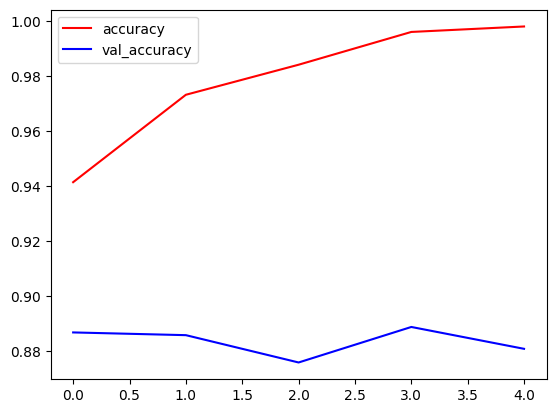

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , label='accuracy' , color='red')
plt.plot(history.history['val_accuracy'] , label='val_accuracy' , color='blue')
plt.legend()
plt.show()

In [ ]:
# The garaph is having large gap , means overfitting problem
# so using data augmentation to solve this problem

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
    # The below are the transsormations applied on the train images 
    rescale=1./255 ,
    shear_range=0.2 ,
    zoom_range=0.2 ,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train' ,
    target_size=(150,150) ,
    batch_size=batch_size ,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    'test' ,
    target_size=(150,150) ,
    batch_size=batch_size ,
    class_mode='binary'
)


Found 1008 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.


In [29]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [33]:
history = model.fit(
    train_generator , 
    epochs=5 ,
    validation_data = validation_generator
)

C:\Users\91993\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.5635 - loss: 1.4018 - val_accuracy: 0.8353 - val_loss: 0.3784
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.8434 - loss: 0.3551 - val_accuracy: 0.8859 - val_loss: 0.2958
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.8858 - loss: 0.2775 - val_accuracy: 0.8790 - val_loss: 0.2771
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.9142 - loss: 0.2279 - val_accuracy: 0.8829 - val_loss: 0.2752
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9231 - loss: 0.2004 - val_accuracy: 0.8899 - val_loss: 0.2578


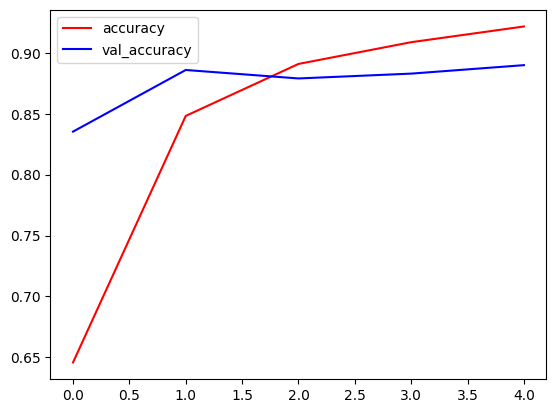

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , label='accuracy' , color='red')
plt.plot(history.history['val_accuracy'] , label='val_accuracy' , color='blue')
plt.legend()
plt.show()


# the below is the accuracy graph after using data augmentation

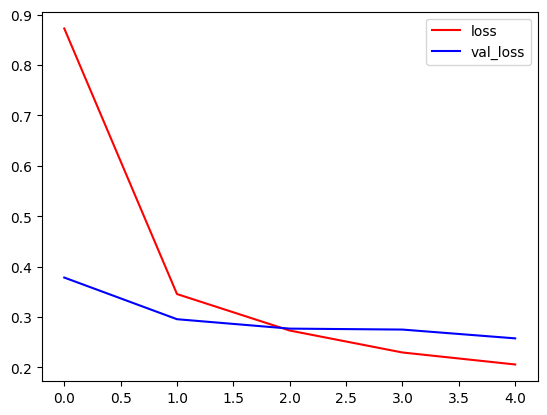

In [35]:
plt.plot(history.history['loss'] , label='loss' , color='red')
plt.plot(history.history['val_loss'] , label='val_loss' , color='blue')
plt.legend()
plt.show()


# The below is the loss function graph


### Fine Tuning

In [42]:
conv_base.trainable = True

set_trainable = False

# From the block level onwards 5 making its set trainable as true and for rest as false
# Means basically for the first few layers making its trainable as false , for the next making it false
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(layer.name , layer.trainable)

input_layer_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [43]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [44]:
model = Sequential()

model.add(conv_base)   # the new model we made will have a conv base
model.add(Flatten()) # then flatten the model
model.add(Dense(256, activation='relu'))   # then add a dense layer with 256 neurons 
model.add(Dense(1, activation='sigmoid'))

In [45]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (150,150)
)

Found 1008 files belonging to 2 classes.
Found 1008 files belonging to 2 classes.


In [46]:
# Before sending the model , normalizing the data
def process(image , label):
    image = tensorflow.cast(image/255. , tensorflow.float32)
    return image , label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [48]:
model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate=1e-5) ,
    loss = 'binary_crossentropy' ,
    metrics = ['accuracy']
)

In [49]:
history = model.fit(train_ds , epochs=5 , validation_data=validation_ds)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.7112 - loss: 0.5791 - val_accuracy: 0.8433 - val_loss: 0.4123
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.8920 - loss: 0.3182 - val_accuracy: 0.8651 - val_loss: 0.3243
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.9373 - loss: 0.2109 - val_accuracy: 0.8512 - val_loss: 0.3316
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.9657 - loss: 0.1456 - val_accuracy: 0.8869 - val_loss: 0.2605
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.9825 - loss: 0.1063 - val_accuracy: 0.8978 - val_loss: 0.2382


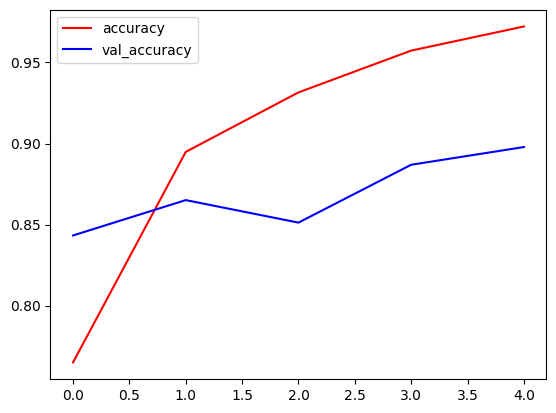

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , label='accuracy' , color='red')
plt.plot(history.history['val_accuracy'] , label='val_accuracy' , color='blue')
plt.legend()
plt.show()

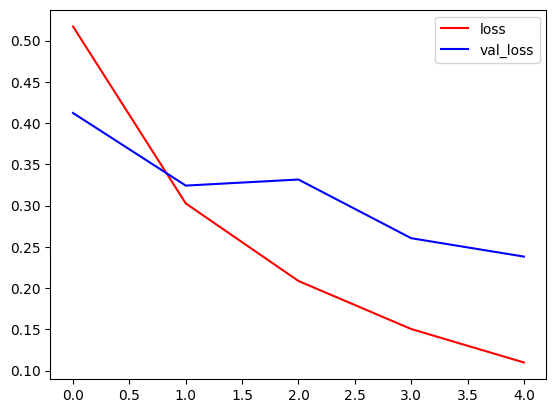

In [51]:
plt.plot(history.history['loss'] , label='loss' , color='red')
plt.plot(history.history['val_loss'] , label='val_loss' , color='blue')
plt.legend()
plt.show()